In [209]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as img
import cv2
import glob


In [210]:
def showImages(image, rows=5,cols=3):
    plt.figure(figsize=(10, 11))
    for i, image in enumerate(image):
        plt.subplot(rows, cols, i+1)
        plt.imshow(image)
        plt.xticks([])
        plt.yticks([])
    plt.tight_layout(pad=0, h_pad=0, w_pad=0)
    plt.show()

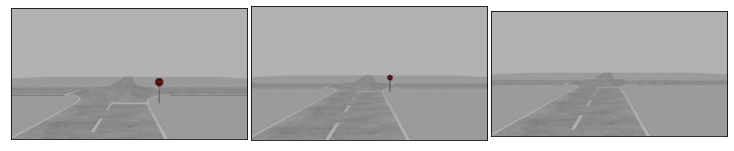

In [211]:
testImages = [plt.imread(img) for img in glob.glob('testImages/*.jpg')]
testImage = img.imread("./testImages/3.jpg");
showImages(testImages);

In [212]:
def mask(image):
    lower_threshold = np.uint8([160, 160, 160])
    upper_threshold = np.uint8([255, 255, 255])
    mask = cv2.inRange(testImage, lower_threshold, upper_threshold)
    maskedImage = cv2.bitwise_and(testImage, testImage, mask = mask)
    return maskedImage;

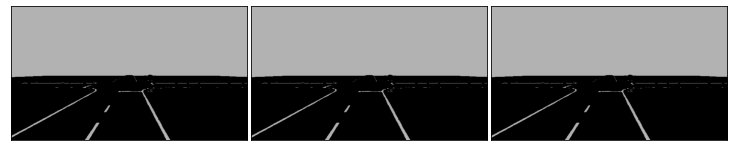

In [213]:
maskedImages = (list(map(mask, testImages)))
showImages(maskedImages);

In [214]:
def grayScale(image):
    return cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

In [215]:
def gaussianSmoothing(image, kernel_size = 9):
    return cv2.GaussianBlur(image, (kernel_size, kernel_size), 0)

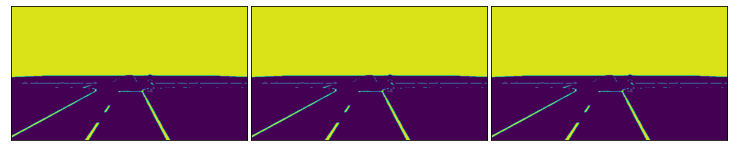

In [216]:
grayImages = (list(map(grayScale, maskedImages)))
showImages(grayImages);

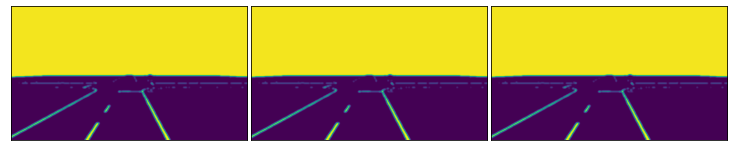

In [217]:
smoothImage = (list(map(gaussianSmoothing, grayImages)))
showImages(smoothImage);

In [218]:
def cannyDetector(image, low_threshold = 50, high_threshold = 150):
    return cv2.Canny(image, low_threshold, high_threshold)

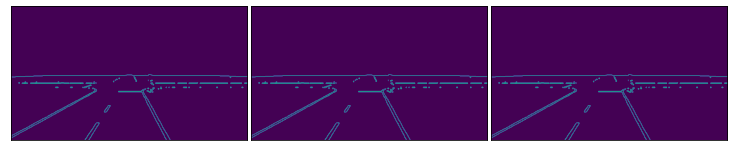

In [219]:
edgeDetected = (list(map(cannyDetector, grayImages)));
showImages(edgeDetected);

In [220]:
def regionOfInterest(image):
    ignore_mask_color = (255);
    rows, cols = image.shape[:2]
    bottom_left  = [0, rows]
    top_left     = [0, rows*0.64]
    bottom_right = [cols*0.69, rows]
    top_right    = [cols*0.65, rows * 0.65]
    mask = np.zeros_like(image);
    vertices = np.array([[bottom_left, top_left, top_right, bottom_right]], dtype=np.int32)
    cv2.fillPoly(mask, vertices, ignore_mask_color)
    masked_image = cv2.bitwise_and(image, mask)
    return masked_image

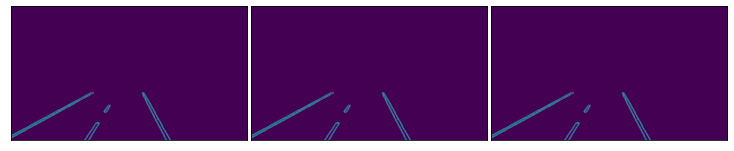

In [221]:
regionDetected = (list(map(regionOfInterest, edgeDetected)));
regionDetected = (list(map(cannyDetector, regionDetected)));
showImages(regionDetected);


In [222]:
def houghTransform(image):
    rho = 1              
    theta = np.pi/180    
    threshold = 20       
    minLineLength = 20   
    maxLineGap = 300     
    return cv2.HoughLinesP(image, rho = rho, theta = theta, threshold = threshold,
                           minLineLength = minLineLength, maxLineGap = maxLineGap)

In [223]:
linedImages = (list(map(houghTransform, regionDetected)));

In [224]:
def drawLines(image, lines, thickness = 2):
    rows,cols = image.shape[:2];
    image = np.copy(image)
    length = 0;
    for line in lines:
        for x1,y1,x2,y2 in line:
            slope = (y2-y1)/(x2-x1)
            intercept = y1 - slope*x1;
            if(slope>0):
                length = np.sqrt((y2-y1)**2 + (x2-x1)**2);
                cv2.line(image, (x1, y1), (x2, y2),[0,255,0] , thickness);
            elif(slope<0 and x1<cols*0.25):
                cv2.line(image, (x1, y1), (x2,y2),[255,0,0] , thickness)
            else:
                cv2.line(image, (x1, y1), (x2, y2), [0,100,255], thickness);
    return image;

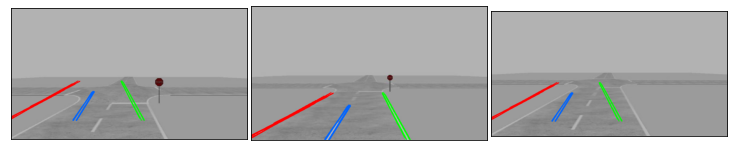

In [225]:
final = []
for image, lines in zip(testImages, linedImages):
    final.append(drawLines(image, lines))
showImages(final)

<h1> I detected the lane lines for one image at first, and after that I applied that algorithm 
to every image
but its not working properly for other images, I have to debug it but the time is over now
